In [37]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataset

Import the preprocessed data set

In [38]:
df_boston = pd.read_csv('./data/prepared/rides_data_prepared.csv', index_col=0, dtype={'start_station_id': np.int64, 'end_station_id': 'string', 'end_station_name': 'string', 'start_station_name': 'string', 'bike_id': np.int64, 'user_type': 'string'})
df_boston['start_time'] = pd.to_datetime(df_boston['start_time'], format='%Y-%m-%d %X')
 
df_boston.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,trip_length,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,date_time,max_temp,min_temp,precip
0,2015-01-01 00:21:44,2015-01-01 00:30:47,115,96,Porter Square Station,Cambridge Main Library at Broadway / Trowbridg...,277,Subscriber,543.0,42.387995,-71.119084,42.373379,-71.111075,2015-01-01 00:00:00,NaN,NaN,NaN
1,2015-01-01 00:27:03,2015-01-01 00:34:21,80,95,MIT Stata Center at Vassar St / Main St,Cambridge St - at Columbia St / Webster Ave,648,Subscriber,438.0,42.361962,-71.092053,42.372969,-71.094445,2015-01-01 00:00:00,NaN,NaN,NaN
2,2015-01-01 00:31:31,2015-01-01 00:35:46,91,68,One Kendall Square at Hampshire St / Portland St,Central Square at Mass Ave / Essex St,555,Subscriber,255.0,42.366277,-71.091690,42.365070,-71.103100,2015-01-01 01:00:00,NaN,NaN,NaN
3,2015-01-01 00:53:46,2015-01-01 01:00:58,115,96,Porter Square Station,Cambridge Main Library at Broadway / Trowbridg...,1307,Subscriber,432.0,42.387995,-71.119084,42.373379,-71.111075,2015-01-01 01:00:00,NaN,NaN,NaN
4,2015-01-01 01:07:06,2015-01-01 01:19:21,105,88,Lower Cambridgeport at Magazine St/Riverside Rd,Inman Square at Vellucci Plaza / Hampshire St,177,Customer,735.0,42.356954,-71.113687,42.374035,-71.101427,2015-01-01 01:00:00,NaN,NaN,NaN


# Demand Calculation

The demand on an hourly basis is defined by the number of rentals started within the respective hour, e.g a rental with start time 10.30 and end time 11.30 counts as a demand of the hour 10


In [39]:
df_demand = df_boston.resample(rule='H', on='start_time').size().reset_index(name='demand')
df_demand.columns = ['date_time', 'demand']
df_demand.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  8760 non-null   datetime64[ns]
 1   demand     8760 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 137.0 KB


In [40]:
df_weather = pd.read_csv('./data/weather_hourly_boston.csv')
df_weather['date_time'] = pd.to_datetime(df_weather['date_time'], format='%Y-%m-%d %X')
df_demand = df_demand.merge(df_weather, how = 'left', on = 'date_time')
df_demand.head(10)

,date_time,demand,max_temp,min_temp,precip
0,2015-01-01 00:00:00,4,NaN,NaN,NaN
1,2015-01-01 01:00:00,3,NaN,NaN,NaN
2,2015-01-01 02:00:00,1,NaN,NaN,NaN
3,2015-01-01 03:00:00,0,NaN,NaN,NaN
4,2015-01-01 04:00:00,1,NaN,NaN,NaN
5,2015-01-01 05:00:00,0,NaN,NaN,NaN
6,2015-01-01 06:00:00,0,-5.6,-5.6,0.0
7,2015-01-01 07:00:00,0,-5.6,-5.6,0.0
8,2015-01-01 08:00:00,4,-5.6,-5.6,0.0
9,2015-01-01 09:00:00,2,-4.4,-4.4,0.0


# Feature Engineering

## Previous demand as input

In [41]:
df_demand['demand_h-1'] = df_demand.demand.shift(periods=11)
df_demand['demand_h-2'] = df_demand.demand.shift(periods=2)
df_demand['demand_h-24'] = df_demand.demand.shift(periods=24)
df_demand.head(50)

,date_time,demand,max_temp,min_temp,precip,demand_h-1,demand_h-2,demand_h-24
0,2015-01-01 00:00:00,4,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01 01:00:00,3,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01 02:00:00,1,NaN,NaN,NaN,NaN,4.0,NaN
3,2015-01-01 03:00:00,0,NaN,NaN,NaN,NaN,3.0,NaN
4,2015-01-01 04:00:00,1,NaN,NaN,NaN,NaN,1.0,NaN
5,2015-01-01 05:00:00,0,NaN,NaN,NaN,NaN,0.0,NaN
6,2015-01-01 06:00:00,0,-5.6,-5.6,0.0,NaN,1.0,NaN
7,2015-01-01 07:00:00,0,-5.6,-5.6,0.0,NaN,0.0,NaN
8,2015-01-01 08:00:00,4,-5.6,-5.6,0.0,NaN,0.0,NaN
9,2015-01-01 09:00:00,2,-4.4,-4.4,0.0,NaN,0.0,NaN


### Average temperature

In [42]:
df_demand['avg_temp'] = (df_demand.min_temp + df_demand.max_temp)/2
df_demand.head(10)

,date_time,demand,max_temp,min_temp,precip,demand_h-1,demand_h-2,demand_h-24,avg_temp
0,2015-01-01 00:00:00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01 01:00:00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01 02:00:00,1,NaN,NaN,NaN,NaN,4.0,NaN,NaN
3,2015-01-01 03:00:00,0,NaN,NaN,NaN,NaN,3.0,NaN,NaN
4,2015-01-01 04:00:00,1,NaN,NaN,NaN,NaN,1.0,NaN,NaN
5,2015-01-01 05:00:00,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
6,2015-01-01 06:00:00,0,-5.6,-5.6,0.0,NaN,1.0,NaN,-5.6
7,2015-01-01 07:00:00,0,-5.6,-5.6,0.0,NaN,0.0,NaN,-5.6
8,2015-01-01 08:00:00,4,-5.6,-5.6,0.0,NaN,0.0,NaN,-5.6
9,2015-01-01 09:00:00,2,-4.4,-4.4,0.0,NaN,0.0,NaN,-4.4


### Season 

In [43]:
def determine_season(row):
    if row.date_time < datetime(2015,3,20):
        return 'winter'
    elif row.date_time >= datetime(2015,3,20) and row.date_time < datetime(2015,6,21):
        return 'spring'
    elif row.date_time >= datetime(2015,6,21) and row.date_time < datetime(2015,9,23):
        return 'autumn'
    else:
        return 'winter'

df_demand['season'] = df_demand.apply((lambda x: determine_season(x)), axis=1)
df_demand = pd.get_dummies(df_demand, columns=['season'])
df_demand.head()

,date_time,demand,max_temp,min_temp,precip,demand_h-1,demand_h-2,demand_h-24,avg_temp,season_autumn,season_spring,season_winter
0,2015-01-01 00:00:00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
1,2015-01-01 01:00:00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
2,2015-01-01 02:00:00,1,NaN,NaN,NaN,NaN,4.0,NaN,NaN,0,0,1
3,2015-01-01 03:00:00,0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,0,0,1
4,2015-01-01 04:00:00,1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0,0,1


### Time features

#### Weekend feature
In the descriptive analysis we have seen that on saturday and sunday the demand particularly low, hence we engineer a feature "weekend" which is 1 for all rides on saturday & sunday and zero for all other days.

In [44]:
def determine_weekend(row):
    if row.date_time.weekday() > 4:
        return 1
    else:
        return 0

df_demand['weekend'] = df_demand.apply((lambda x: determine_weekend(x)), axis=1)
df_demand.head()

,date_time,demand,max_temp,min_temp,precip,demand_h-1,demand_h-2,demand_h-24,avg_temp,season_autumn,season_spring,season_winter,weekend
0,2015-01-01 00:00:00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0
1,2015-01-01 01:00:00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0
2,2015-01-01 02:00:00,1,NaN,NaN,NaN,NaN,4.0,NaN,NaN,0,0,1,0
3,2015-01-01 03:00:00,0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,0,0,1,0
4,2015-01-01 04:00:00,1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0,0,1,0


#### Daytime features
Further the descriptive analysis has shown that the daytime, i.e. if it is night, morning, afternoon or evening, plays an important role for the demand. Hence, we engineer four features that respectively indicate if a rides takes place during
* Morning: 6am - 12pm
* Afternoon: 12pm - 6pm
* Evening: 6pm - 11pm
* Night: 12am - 6am

In [45]:
point_of_day = ["morning", "afternoon", "evening", "night"]
morning_hours = [*range(6, 12)]
afternoon_hours = [*range(12, 18)]
evening = [*range(18, 23)]
night = [23] + [*range(0, 6)]


def get_point_of_day(hour):
    if hour in morning_hours:
        return "morning"
    elif hour in afternoon_hours:
        return "afternoon"
    elif hour in evening:
        return "evening"
    elif hour in night:
        return "night"

In [46]:
df_demand['daytime'] = df_demand["date_time"].dt.hour.apply(lambda x: get_point_of_day(x))
df_demand = pd.get_dummies(df_demand, columns=['daytime'])


In [47]:
df_demand.head()

,date_time,demand,max_temp,min_temp,precip,demand_h-1,demand_h-2,demand_h-24,avg_temp,season_autumn,season_spring,season_winter,weekend,daytime_afternoon,daytime_evening,daytime_morning,daytime_night
0,2015-01-01 00:00:00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,1
1,2015-01-01 01:00:00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,1
2,2015-01-01 02:00:00,1,NaN,NaN,NaN,NaN,4.0,NaN,NaN,0,0,1,0,0,0,0,1
3,2015-01-01 03:00:00,0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,0,0,1,0,0,0,0,1
4,2015-01-01 04:00:00,1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0,0,1,0,0,0,0,1


<AxesSubplot:>

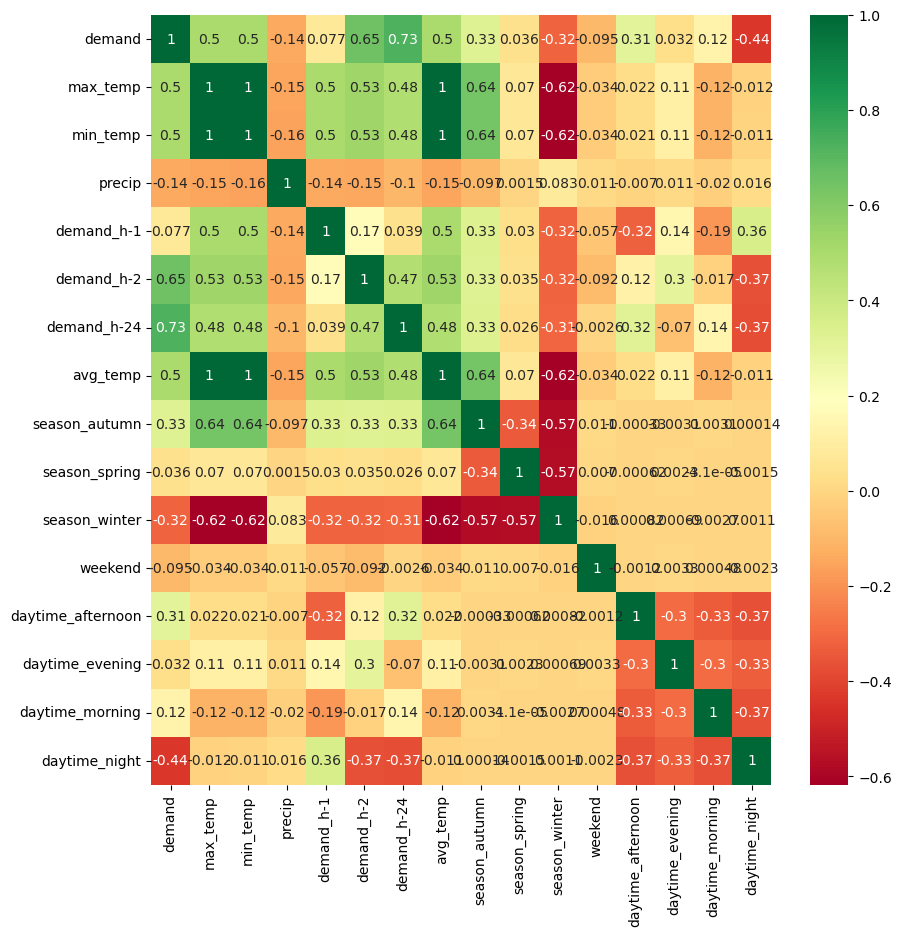

In [48]:
corr_matrix = df_demand.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(10,10))

sns.heatmap(df_demand[top_corr_features].corr(),annot=True,cmap="RdYlGn")